In [100]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from itertools import product
from fractions import Fraction

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)
from helper_functions import get_baseline_fid_from_phi_gamma

In [101]:
def load_from_pickle(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

In [102]:
def collect_filenames(directory, date: str = None):
    """
    Loops over the given directory and collects filenames that match the expected pattern and are created on the specified date.
    
    Parameters:
    - directory (str): The path to the directory containing the pickle files.
    
    Returns:
    - list: A list of filenames that match the expected pattern and date.
    """
    filenames = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".pickle"):
                if date is not None and date in file:
                    filenames.append(os.path.join(root, file))
                # else:   
                #     filenames.append(os.path.join(root, file))
    return filenames

def extract_parameters(filename):
    parts = filename.split("/")
    params_str = parts[-1]  # The parameters are in the last section of the filename
    params_parts = params_str.split("_")
    phi_val = [part for part in params_parts if "phi" in part][0].split("-")[1]
    gamma_val = [part for part in params_parts if "gamma" in part][0].split("-")[1]
    return phi_val, gamma_val


# def collect_filenames(directory, date):
#     """
#     Loops over the given directory and collects filenames that match the expected pattern and are created on the specified date.
    
#     Parameters:
#     - directory (str): The path to the directory containing the pickle files.
#     - date (str): The date in the format "dd-mm-yyyy" to filter files by their creation date.
    
#     Returns:
#     - list: A list of filenames that match the expected pattern and date.
#     """
#     filenames = []
#     for root, dirs, files in os.walk(directory):
#         for file in files:
#             if file.endswith(".pickle") and date in file:
#                 print('file found')
#                 filenames.append(os.path.join(root, file))
#     return filenames


# def extract_parameters(filename):
#     """
#     Extracts parameters from the given filename based on expected patterns.
    
#     Parameters:
#     - filename (str): The filename to extract parameters from.
    
#     Returns:
#     - tuple: A tuple containing the phi and gamma values extracted from the filename.
#     """
#     try:
#         parts = filename.split("/")
#         params_str = parts[-1]  # The parameters are in the last section of the filename
#         params_parts = params_str.split("_")
#         phi_val = next(part.split("-")[1] for part in params_parts if "phi" in part)
#         gamma_val = next(part.split("-")[1] for part in params_parts if "gamma" in part)
#     except (IndexError, StopIteration):
#         raise ValueError(f"Unable to extract parameters from filename: {filename}")
#     return phi_val, gamma_val


Text(0.5, 1.0, 'Phis: 1.0$\\pi$: Baseline fidelity as a function of noise $\\gamma$')

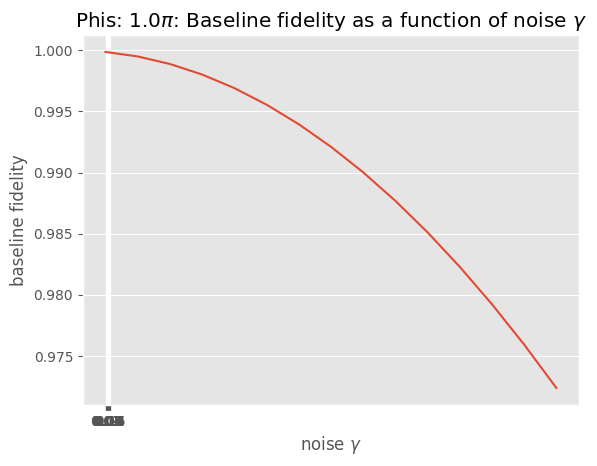

In [121]:
phis = np.pi * np.array([1])
gammas = np.linspace(0.01, 0.15, 15)

storing_infidelities = []
for phi_gamma_tuple in product(phis, gammas):
    phi_gamma_tuple = (phi_gamma_tuple[0], round(phi_gamma_tuple[1], 4))
    baseline_fid = get_baseline_fid_from_phi_gamma(phi_gamma_tuple)
    storing_infidelities.append(np.sqrt(baseline_fid))

plt.plot(storing_infidelities)
plt.xlabel('noise $\gamma$')
plt.xticks(gammas)
plt.ylabel('baseline fidelity')
plt.title(f'Phis: {phis[0]/np.pi}$\\pi$: Baseline fidelity as a function of noise $\gamma$')

In [104]:
data = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noisy_circuit/hpo_results/resource_constraint/phi-1.0pi_gamma-0.03_maxruntime-1200_custom-cost-value-210626.566234_timestamp_14-04-2024_13-41-21.pickle')

In [105]:
data['hyper_params']

{'MINIBATCH_SIZE': 96,
 'BATCHSIZE_MULTIPLIER': 7,
 'N_SHOTS': 7,
 'SAMPLE_PAULIS': 117}

In [106]:
data['training_results']['fidelity_info']

{0.999: {'achieved': True,
  'update_at': 23,
  'train_time': 50.83296608924866,
  'shots_used': 11648256,
  'std_action': array([0.26882723, 0.26527777, 0.2456826 , 0.25323036, 0.22144723,
         0.288233  , 0.23861143], dtype=float32)},
 0.9999: {'achieved': True,
  'update_at': 48,
  'train_time': 103.43532514572144,
  'shots_used': 23062656,
  'std_action': array([0.0843972 , 0.13614339, 0.12149883, 0.0675424 , 0.09754333,
         0.10441245, 0.10864317], dtype=float32)},
 0.99999: {'achieved': False,
  'update_at': None,
  'train_time': None,
  'shots_used': None}}

Plot reminds me of incoherent error with probability p (converges to a value but then gets stuck)

TODO: Find the angles / action vector of the target gate necessary to recover F=1 for the given noise model

RX(gamma*phi) would essentially be counteracted by a RX(-gamma*phi) gate. Find a way to express this RX(-gamma*phi) as a U3 gate

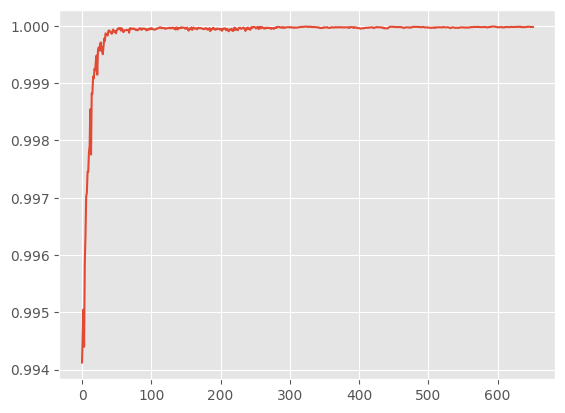

In [107]:
plt.plot(data['training_results']['fidelity_history'])

In [108]:
import pandas as pd
import os
import pickle

# Step 2: Function to process each file and extract data
def process_file(filename):
    phi, gamma = extract_parameters(filename)  # Assuming this function is defined elsewhere
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    training_results = data['training_results']
    fidelity_info = training_results['fidelity_info']
    considered_fidelities = list(fidelity_info.keys())
    # Initialize data structure for this file
    file_data = {
        ('batchsize', ''): data['hyper_params'].get('MINIBATCH_SIZE') * data['hyper_params'].get('BATCHSIZE_MULTIPLIER'),
        ('n_shots', ''): data['hyper_params'].get('N_SHOTS'),
        ('sample_paulis', ''): data['hyper_params'].get('SAMPLE_PAULIS')  # Assuming you have a way to extract this
    }
    # Add fidelity targets and shots used
    for target in [0.999, 0.9999, 0.99999]:
        considered = target in considered_fidelities
        achieved = considered and fidelity_info[target].get('achieved', False)
        shots_used = fidelity_info[target].get('shots_used', 0) if achieved else 'N/A'
        updates_used = fidelity_info[target].get('update_at', 0) if achieved else 'N/A'
        file_data[(f'fidelity: {target}', 'considered')] = considered
        file_data[(f'fidelity: {target}', 'achieved')] = achieved
        file_data[(f'fidelity: {target}', 'shots_used')] = shots_used
        file_data[(f'fidelity: {target}', 'updates_used')] = updates_used
        file_data[(f'fidelity: {target}', 'shots_per_update')] = int(np.ceil(shots_used / updates_used)) if achieved else 'N/A'
    return (phi, gamma), file_data

# Step 3: Create an empty dictionary to store all data before converting to DataFrame
all_data = {}

# Replace 'your_directory_path' with the actual path to your directory containing pickle files
directory_path = '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noisy_circuit/hpo_results/resource_constraint' # '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noisy_circuit/hpo_results/resource_constraint' # '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noisy_circuit/hpo_results/resource_constraint/9-April-2024' # '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noisy_circuit/hpo_results/resource_constraint'specific_date = '11-04-2024'
specific_date = '14-04-2024'

filenames = collect_filenames(directory_path, specific_date) #, specific_date)
print(filenames)

for filename in filenames:
    try:
        index, file_data = process_file(filename)
    except:
        continue
    all_data[index] = file_data

# Converting the dictionary to a DataFrame
# MultiIndex for columns to handle fidelity and whether it was considered or shots used
multi_index = pd.MultiIndex.from_tuples(all_data[next(iter(all_data))].keys()) #, names=['phi', 'gamma'])
df = pd.DataFrame(all_data).T
df.columns = multi_index

phi_gamma_numeric = [(float(phi[:-2]), round(float(gamma), 2)) for phi, gamma in df.index]

# Create a temporary DataFrame for sorting purposes
temp_df_for_sorting = pd.DataFrame(phi_gamma_numeric, index=df.index, columns=['numeric_phi', 'numeric_gamma'])

# Get a sorted list of index based on numeric_phi and numeric_gamma
sorted_index = temp_df_for_sorting.sort_values(by=['numeric_phi', 'numeric_gamma']).index

# Reindex the original DataFrame using the sorted index
sorted_df = df.reindex(sorted_index)

# Round gamma values to 2 digits
sorted_df.index = sorted_df.index.set_levels(sorted_df.index.levels[1].astype(float).round(2), level=1)

sorted_df.index.names = ['phi', 'gamma']

# Now the DataFrame is sorted by phi and gamma in the desired order
sorted_df.head()

['/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noisy_circuit/hpo_results/resource_constraint/phi-1.0pi_gamma-0.03_maxruntime-1200_custom-cost-value-210626.566234_timestamp_14-04-2024_13-41-21.pickle', '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noisy_circuit/hpo_results/resource_constraint/phi-0.5pi_gamma-0.02_maxruntime-1200_custom-cost-value-2267409.914477_timestamp_14-04-2024_07-07-38.pickle', '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noisy_circuit/hpo_results/resource_constraint/phi-0.75pi_gamma-0.05_maxruntime-1200_custom-cost-value-296576.342633_timestamp_14-04-2024_07-07-14.pickle', '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Contr

batchsize n_shots sample_paulis fidelity: 0.999           \
                                                  considered achieved   
phi    gamma                                                            
0.25pi 0.02        480      26           119            True     True   
       0.03         50      22            77            True    False   
       0.04         70       2            98            True    False   
       0.05         60      38           116            True    False   
0.5pi  0.02        448      31           114            True    False   

                                                      fidelity: 0.9999  \
             shots_used updates_used shots_per_update       considered   
phi    gamma                                                             
0.25pi 0.02     4432320           15           295488             True   
       0.03         N/A          N/A              N/A             True   
       0.04         N/A          N/A              N/A             True   
       0.05         N/A          N/A              N/A             True   
0.5pi  0.02         N/A          N/A              N/A             True   

                                                                \
             achieved shots_used updates_used shots_per_update   
phi    gamma                                                     
0.25pi 0.02     False        N/A          N/A              N/A   
       0.03     False        N/A          N/A              N/A   
       0.04     False        N/A          N/A              N/A   
       0.05     False        N/A          N/A              N/A   
0.5pi  0.02     False        N/A          N/A              N/A   

             fidelity: 0.99999                                   \
                    considered achieved shots_used updates_used   
phi    gamma                                                      
0.25pi 0.02               True    False        N/A          N/A   
       0.03               True    False        N/A          N/A   
       0.04               True    False        N/A          N/A   
       0.05               True    False        N/A          N/A   
0.5pi  0.02               True    False        N/A          N/A   

                               
             shots_per_update  
phi    gamma                   
0.25pi 0.02               N/A  
       0.03               N/A  
       0.04               N/A  
       0.05               N/A  
0.5pi  0.02               N/A

## TODO (8 April 2024)
- Adapt in train_ppo: Use sliding window of certain length of which its mean needs to surpass the fidelity target: This is to be more confident with having found the plateau (so a good set of actions)
- Use N_REPS to amplify the inital noise: Hopefully we can amplify the effect of the noise like that leading to all (phi, gamma) combinations to be considered
- Plot the product of SAMPLE_PAULIS * N_SHOTS on y-axis
- Draw a line that seperates the regimes: Exploration vs Exploitation

In [109]:
sorted_df.columns

MultiIndex([(        'batchsize',                 ''),
            (          'n_shots',                 ''),
            (    'sample_paulis',                 ''),
            (  'fidelity: 0.999',       'considered'),
            (  'fidelity: 0.999',         'achieved'),
            (  'fidelity: 0.999',       'shots_used'),
            (  'fidelity: 0.999',     'updates_used'),
            (  'fidelity: 0.999', 'shots_per_update'),
            ( 'fidelity: 0.9999',       'considered'),
            ( 'fidelity: 0.9999',         'achieved'),
            ( 'fidelity: 0.9999',       'shots_used'),
            ( 'fidelity: 0.9999',     'updates_used'),
            ( 'fidelity: 0.9999', 'shots_per_update'),
            ('fidelity: 0.99999',       'considered'),
            ('fidelity: 0.99999',         'achieved'),
            ('fidelity: 0.99999',       'shots_used'),
            ('fidelity: 0.99999',     'updates_used'),
            ('fidelity: 0.99999', 'shots_per_update')],
         

In [110]:
fidelity = '0.999'

considered_col = ('fidelity: ' + fidelity, 'considered')
achieved_col = ('fidelity: ' + fidelity, 'achieved')
shots_used_col = ('fidelity: ' + fidelity, 'shots_used')
filtered_df = sorted_df[(sorted_df[considered_col] == True) & (sorted_df[achieved_col] == True)]
filtered_df

batchsize n_shots sample_paulis fidelity: 0.999           \
                                                  considered achieved   
phi    gamma                                                            
0.25pi 0.02        480      26           119            True     True   
0.5pi  0.05        320      35           105            True     True   
0.75pi 0.03        288      35            76            True     True   
       0.04        480      33            48            True     True   
       0.05        384      49           102            True     True   
1.0pi  0.03        672       7           117            True     True   
       0.04        768      30            91            True     True   
       0.05        480      19            69            True     True   

                                                      fidelity: 0.9999  \
             shots_used updates_used shots_per_update       considered   
phi    gamma                                                             
0.25pi 0.02     4432320           15           295488             True   
0.5pi  0.05    13440960           16           840060             True   
0.75pi 0.03    17611776           26           677376             True   
       0.04     3843840           33           116480             True   
       0.05    30657536           37           828583             True   
1.0pi  0.03    11648256           23           506446             True   
       0.04     6129408           24           255392             True   
       0.05      480960           23            20912             True   

                                                                \
             achieved shots_used updates_used shots_per_update   
phi    gamma                                                     
0.25pi 0.02     False        N/A          N/A              N/A   
0.5pi  0.05      True   32335680           40           808392   
0.75pi 0.03     False        N/A          N/A              N/A   
       0.04     False        N/A          N/A              N/A   
       0.05     False        N/A          N/A              N/A   
1.0pi  0.03      True   23062656           48           480472   
       0.04     False        N/A          N/A              N/A   
       0.05     False        N/A          N/A              N/A   

             fidelity: 0.99999                                   \
                    considered achieved shots_used updates_used   
phi    gamma                                                      
0.25pi 0.02               True    False        N/A          N/A   
0.5pi  0.05               True    False        N/A          N/A   
0.75pi 0.03               True    False        N/A          N/A   
       0.04               True    False        N/A          N/A   
       0.05               True    False        N/A          N/A   
1.0pi  0.03               True    False        N/A          N/A   
       0.04               True    False        N/A          N/A   
       0.05               True    False        N/A          N/A   

                               
             shots_per_update  
phi    gamma                   
0.25pi 0.02               N/A  
0.5pi  0.05               N/A  
0.75pi 0.03               N/A  
       0.04               N/A  
       0.05               N/A  
1.0pi  0.03               N/A  
       0.04               N/A  
       0.05               N/A

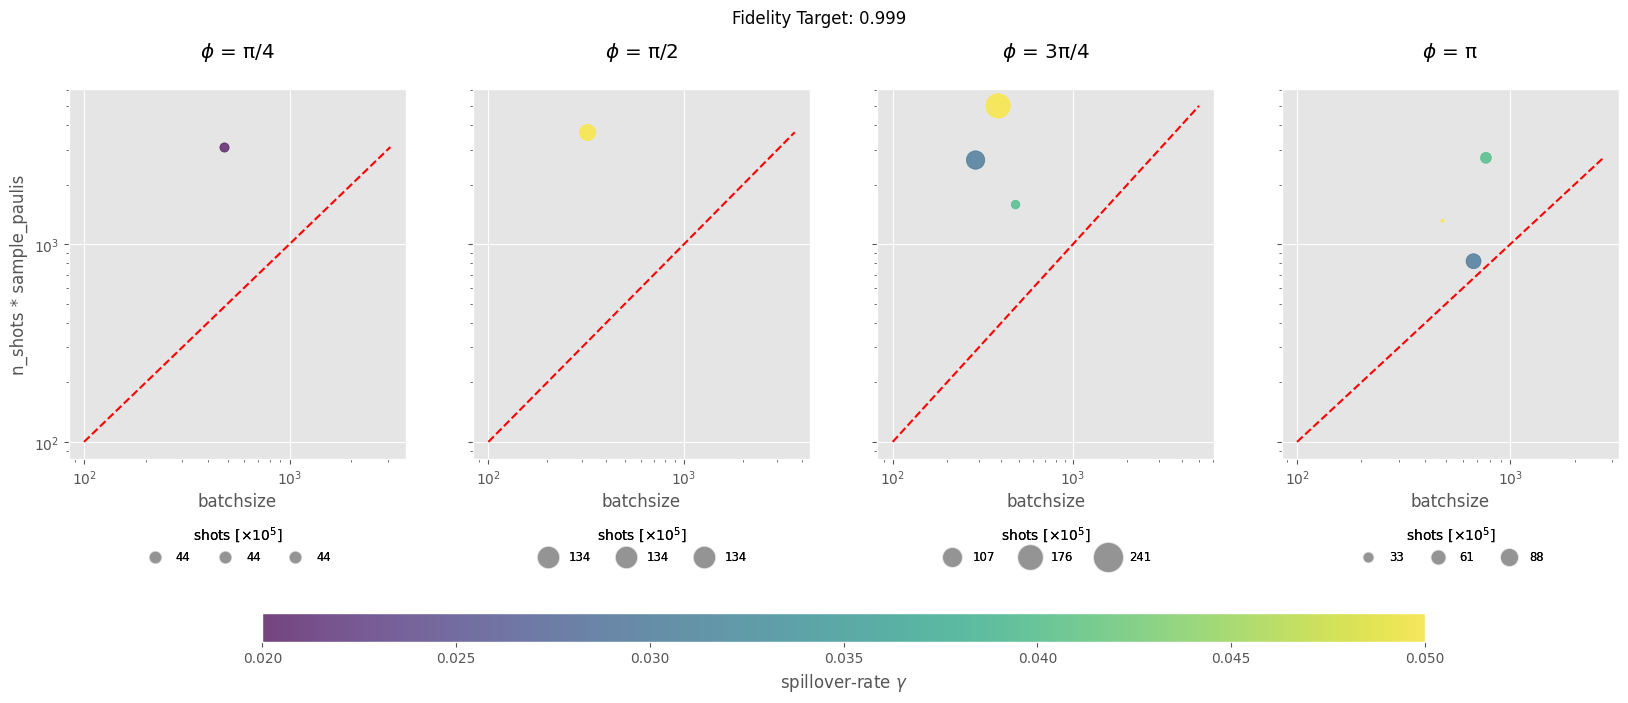

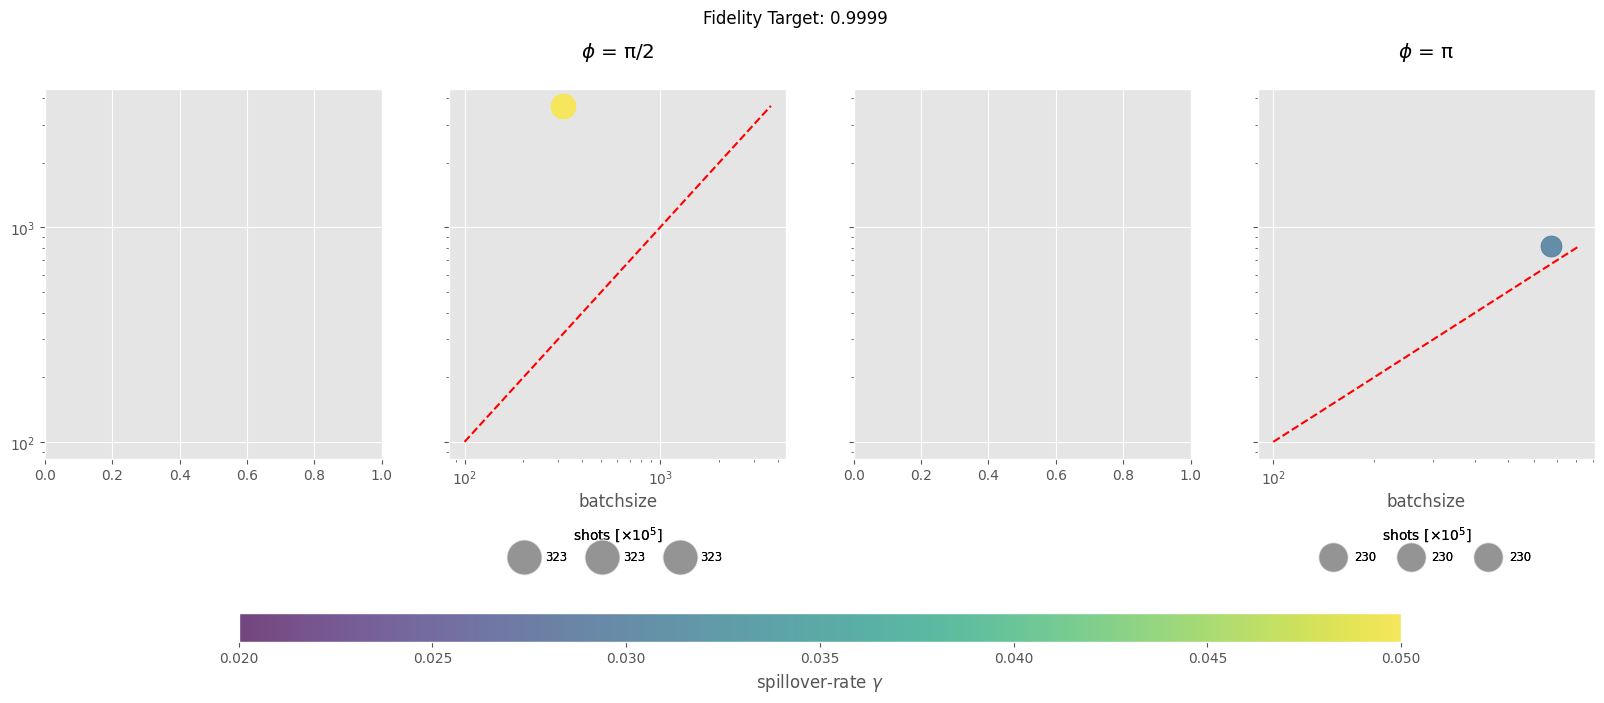

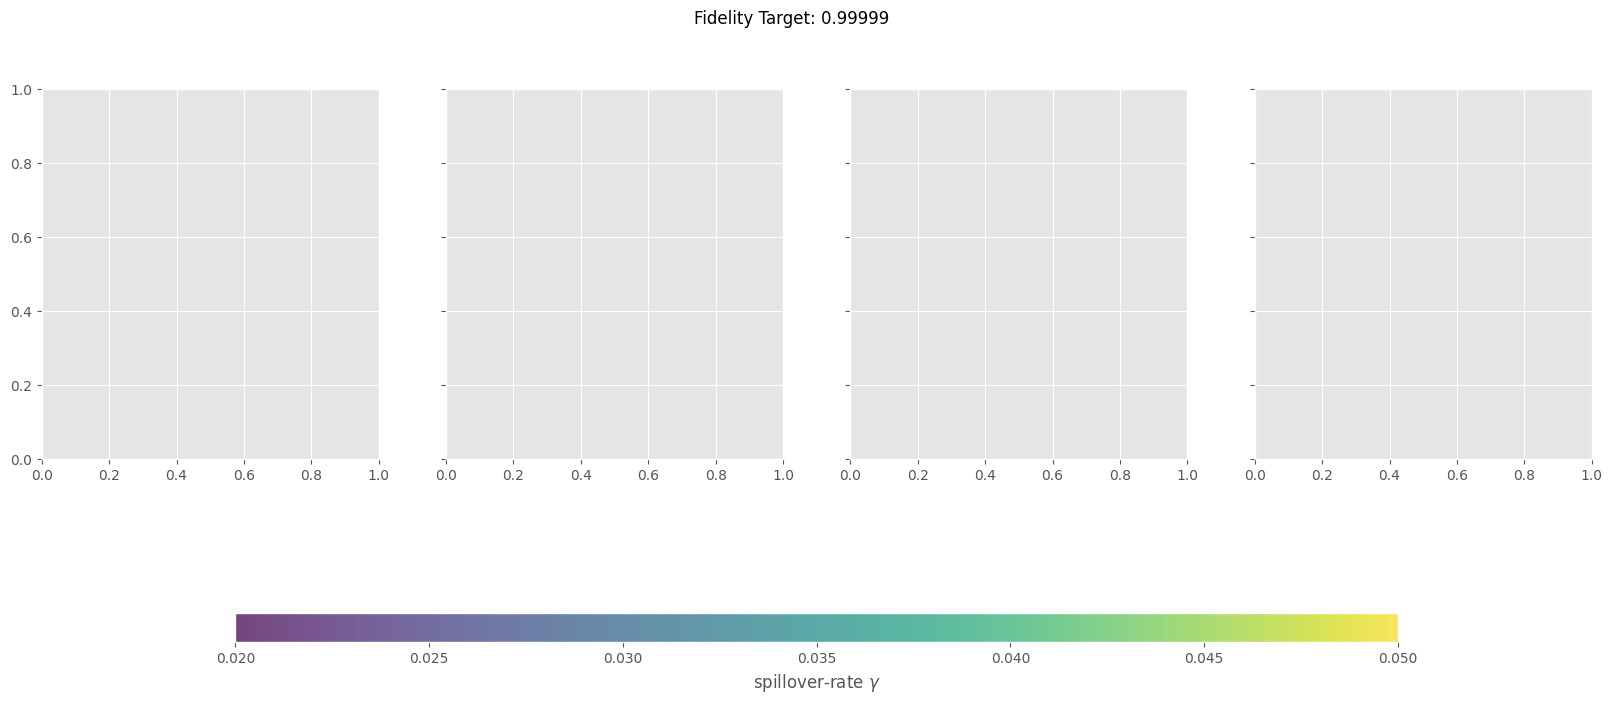

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fractions import Fraction

# Assuming your DataFrame is named df and is properly indexed with 'phi' and 'gamma' as MultiIndex levels
# Here's how you might structure your plotting script:

fidelity_levels = ['0.999', '0.9999', '0.99999']
phi_values = ['0.25pi', '0.5pi', '0.75pi', '1.0pi']

plt.style.use('ggplot')

# Determine the global range of gamma values for consistent color mapping
gamma_values_global = df.index.get_level_values(1).unique()
gamma_range = [gamma_values_global.min(), gamma_values_global.max()]

# Create a figure for each fidelity level
for fidelity in fidelity_levels:
    fig, axs = plt.subplots(1, 4, figsize=(20, 8), sharey=True)
    fig.suptitle(f'Fidelity Target: {fidelity}')

    for i, phi in enumerate(phi_values):
        ax = axs[i]
        
        # Filter DataFrame for the current fidelity and phi, where considered and achieved are True
        subset_df = df.xs(key=(phi, slice(None)), level=(0, 1), drop_level=False)
        subset_df = subset_df[(subset_df[(f'fidelity: {fidelity}', 'considered')] == True) & 
                              (subset_df[(f'fidelity: {fidelity}', 'achieved')] == True)]

        # Skip if empty
        if subset_df.empty:
            continue

        # Extract relevant data
        batchsize = subset_df['batchsize']
        n_shots_times_sample_paulis = subset_df['n_shots'] * subset_df['sample_paulis']
        shots_used_normalized = (subset_df[(f'fidelity: {fidelity}', 'shots_used')] / 1e5).tolist()
        gamma_values = np.array(subset_df.index.get_level_values(1).astype(float))

        # Scatter plot
        scatter = ax.scatter(x=batchsize, y=n_shots_times_sample_paulis, s=shots_used_normalized,
                             c=gamma_values, cmap='viridis', alpha=0.7, vmin=gamma_range[0], vmax=gamma_range[1])
        
        # Add a scattered red line with y=x
        ax.plot([1e2, max(n_shots_times_sample_paulis)], [1e2, max(n_shots_times_sample_paulis)], color='red', linestyle='--')
        
        legend_sizes = 2 * np.quantile(shots_used_normalized, [0.25, 0.5, 0.75])
        labels = [f'{int(size/2)}' for size in legend_sizes]
        scatter_handles = [plt.scatter([], [], s=size, color="gray", alpha=0.6, edgecolors="w", linewidth=1) for size in legend_sizes]
        # bubble_legend = ax.legend(scatter_handles, labels, title='Shot sizes', loc='upper left', frameon=True, fontsize='small')
        bubble_legend = ax.legend(scatter_handles, labels, title='shots $[\\times 10^{5}]$', loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, fontsize='small', ncol=len(labels))  # legend(scatter_handles, labels, title='shots $[\\times 10^{5}]$', loc='upper left', frameon=True, fontsize='small')
        ax.add_artist(bubble_legend)  # Add bubble size legend back to each subplot


        subset_df[('efficiency', '')] = 1 / pd.to_numeric(subset_df[(f'fidelity: {fidelity}', 'shots_used')], errors='coerce').replace({0: np.nan})

        # Analyze correlation
        # Compute Pearson correlation of efficiency with 'batchsize' and 'n_shots'
        # correlation_batchsize_efficiency = subset_df[('batchsize', '')].corr(subset_df[('efficiency', '')])
        # correlation_n_shots_efficiency = subset_df[('n_shots', '')].corr(subset_df[('efficiency', '')])

        # correlation_string = "$\\mathcal{C}$(bs, effic.)=" + str(round(correlation_batchsize_efficiency, 4)) \
        #                         +  ",  $\\mathcal{C}$(shots, effic.)=" + str(round(correlation_n_shots_efficiency, 4))   


        phi_fraction = Fraction(phi[:-2]).limit_denominator()
        numerator, denominator = phi_fraction.numerator, phi_fraction.denominator
        if numerator != 1 and denominator != 1:
            ax.set_title(f'$\\phi$ = {numerator}π/{denominator}\n') # {correlation_string}')
        elif denominator != 1:
            ax.set_title(f'$\\phi$ = π/{denominator}\n') # {correlation_string}')
        else:
            ax.set_title(f'$\\phi$ = π\n') # {correlation_string}')

        ax.set_xlabel('batchsize')
        ax.set_ylabel('n_shots * sample_paulis' if i == 0 else '')  

        # ax.set_xlim(int(1e2), 1.25*max(n_shots_times_sample_paulis))
        # ax.set_ylim(int(1e2), 1.25*max(n_shots_times_sample_paulis))

        ax.set_xscale('log')
        ax.set_yscale('log')

    # Add a colorbar to the last subplot, linking it to the gamma values, but only once per fidelity level
    cbar = fig.colorbar(scatter, ax=axs.ravel().tolist(), orientation='horizontal', pad=0.25, aspect=40, shrink=0.75, label='spillover-rate $\gamma$')

    # plt.tight_layout(rect=[0, 0.3, 1, 0.95])
    plt.show()

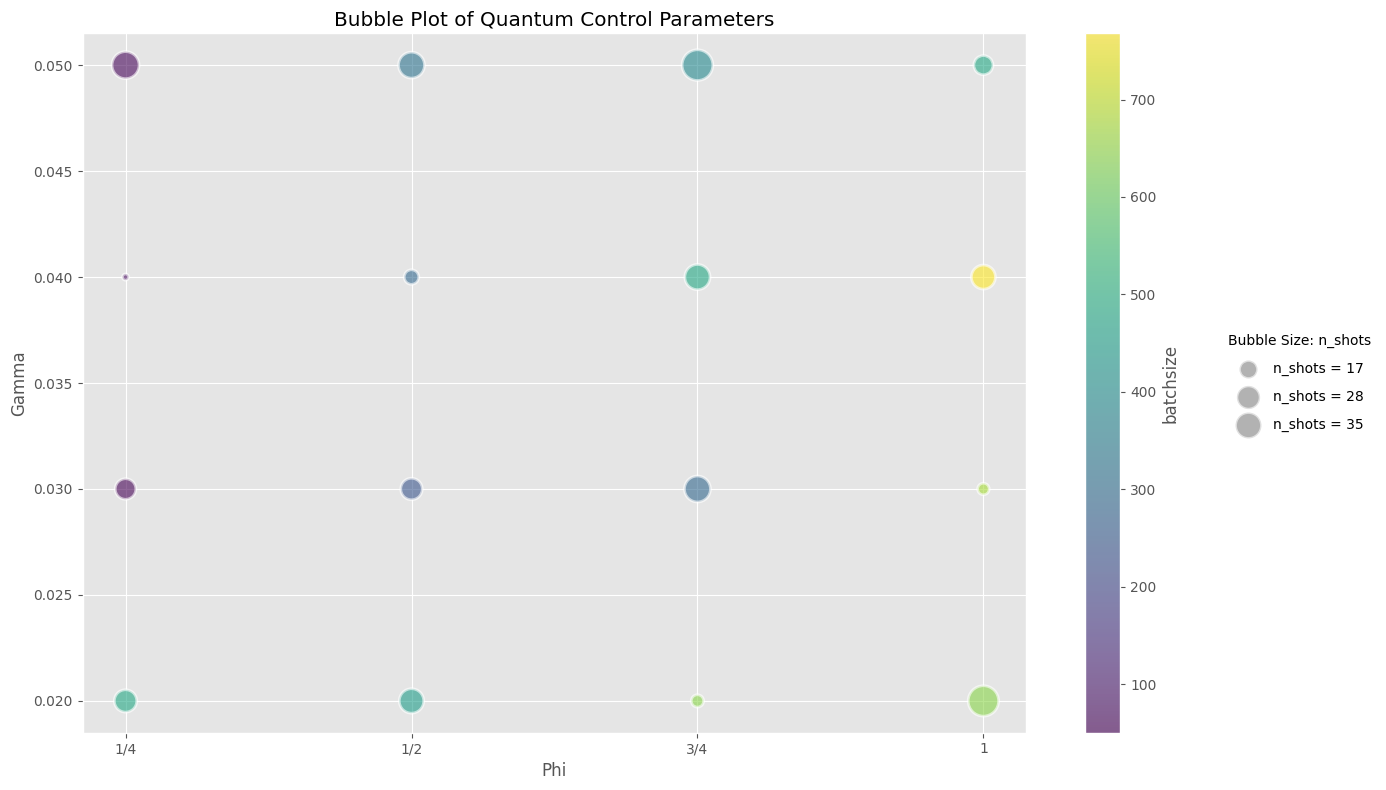

In [112]:
def plot_bubble_plot_n_shots_sizes(df):
    # Extract 'phi' and 'gamma' as floats for plotting
    phi = np.array([float(index[0][:-2]) for index in df.index])
    gamma = np.array([float(index[1]) for index in df.index])
    

    # Adjusting roles: 'n_shots' for sizes and 'sample_paulis' for colors
    # Convert both to numeric, ensuring NaNs are handled correctly
    bubble_sizes = pd.to_numeric(df[('n_shots', '')], errors='coerce').values * 10  # Adjust scale factor for bubble sizes
    colors = pd.to_numeric(df[('batchsize', '')], errors='coerce').values
    
    # Filter out NaN values to ensure consistent array sizes
    valid_entries = ~np.isnan(bubble_sizes) & ~np.isnan(colors)
    phi, gamma, bubble_sizes, colors = phi[valid_entries], gamma[valid_entries], bubble_sizes[valid_entries], colors[valid_entries]

    # Plotting
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(phi, gamma, s=bubble_sizes, c=colors, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=2)
    plt.colorbar(scatter, label='batchsize')
    plt.xlabel('Phi')
    plt.ylabel('Gamma')
    plt.title('Bubble Plot of Quantum Control Parameters')
    plt.grid(True)
    
    # Set custom x-axis ticks
    plt.xticks([0.25, 0.5, 0.75, 1], ['1/4', '1/2', '3/4', '1'])
    
    # Legend for bubble sizes (n_shots)
    # Define representative sizes for the legend (adjust based on your data scale)
    legend_sizes = np.quantile(bubble_sizes, [0.25, 0.5, 0.75])  # Using quantiles as examples
    labels = [f'n_shots = {int(size/10)}' for size in legend_sizes]  # Scale factor adjustment
    handles = [plt.scatter([], [], s=size, c="gray", alpha=0.6, edgecolors="w", linewidth=2) for size in legend_sizes]
    plt.legend(handles, labels, scatterpoints=1, frameon=False, labelspacing=1, title='Bubble Size: n_shots', loc='center left', bbox_to_anchor=(1.2, 0.5))
    
    plt.tight_layout()
    plt.show()

# Assuming 'sorted_df' is your DataFrame, call the function as follows:
plot_bubble_plot_n_shots_sizes(sorted_df)

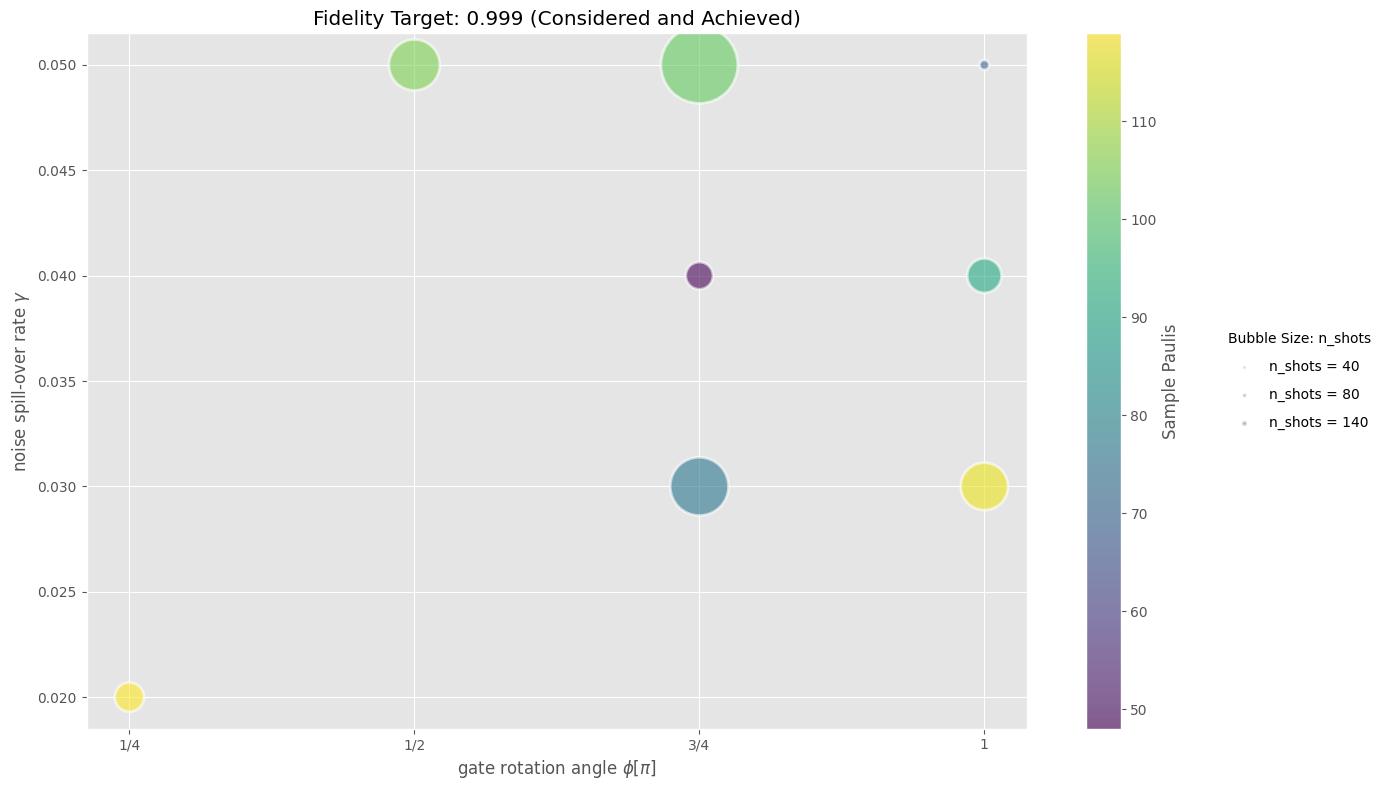

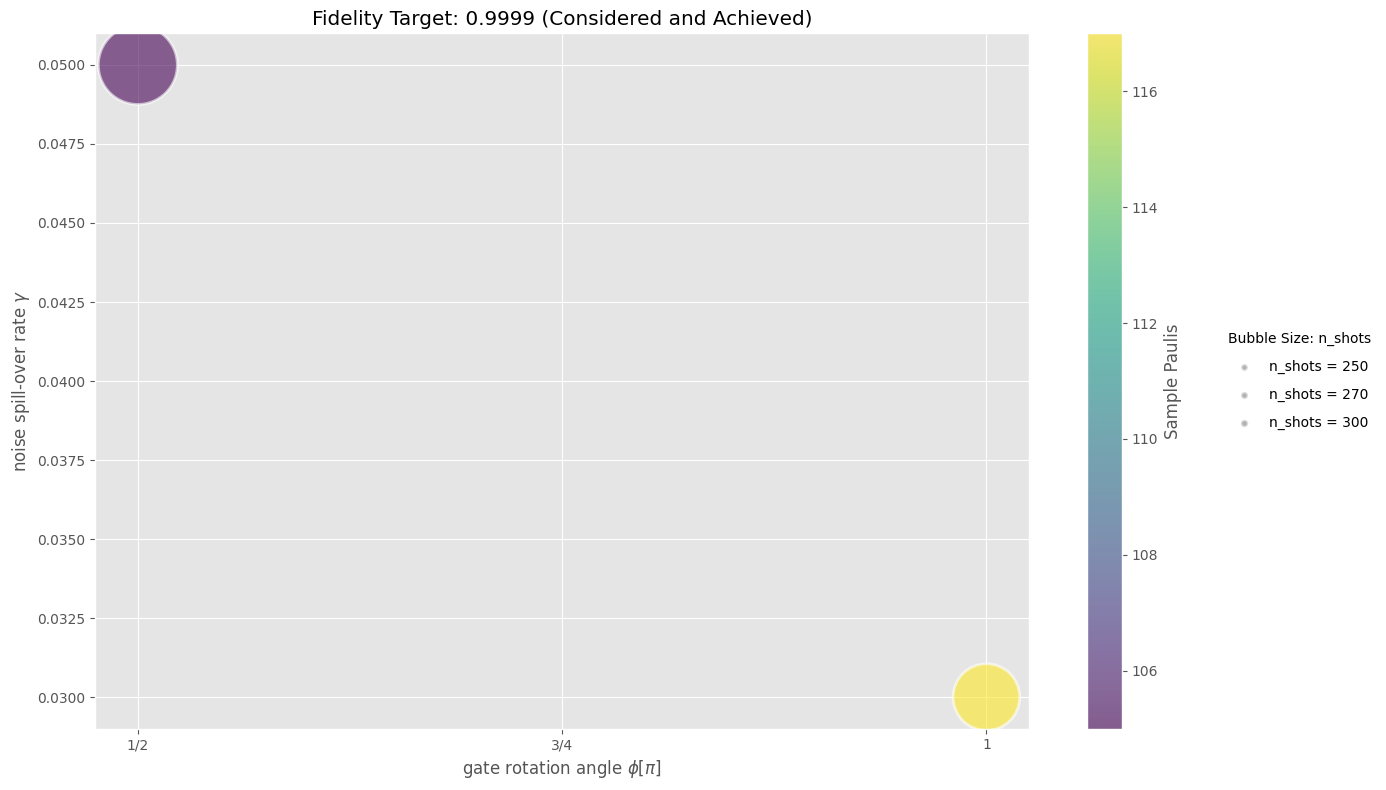

No data for fidelity: 0.99999 where both considered and achieved.


In [113]:
def plot_bubble_plot_per_fidelity(df, fidelity_levels):
    for fidelity in fidelity_levels:
        # Building multi-index columns for considered and achieved fidelity
        considered_col = (f'fidelity: {fidelity}', 'considered')
        achieved_col = (f'fidelity: {fidelity}', 'achieved')
        shots_used_col = (f'fidelity: {fidelity}', 'shots_used')

        # Filter DataFrame for rows where fidelity is considered and achieved
        fidelity_df = df[(df[considered_col] == True) & (df[achieved_col] == True)]

        if fidelity_df.empty:
            print(f"No data for fidelity: {fidelity} where both considered and achieved.")
            continue

        # Extract 'phi' and 'gamma' as floats for plotting
        phi = np.array([float(index[0][:-2]) for index in fidelity_df.index])
        gamma = np.array([float(index[1]) for index in fidelity_df.index])

        # 'n_shots' for sizes and 'sample_paulis' for colors
        bubble_sizes = pd.to_numeric(fidelity_df[shots_used_col], errors='coerce').values / 1e6
        # bubble_sizes = np.where(bubble_sizes > 0, np.log10(bubble_sizes), 0)
        colors = pd.to_numeric(fidelity_df[('sample_paulis', '')], errors='coerce').values

        # Filter out NaN values
        valid_entries = ~np.isnan(bubble_sizes) & ~np.isnan(colors)
        phi, gamma, bubble_sizes, colors = phi[valid_entries], gamma[valid_entries], bubble_sizes[valid_entries], colors[valid_entries]

        # Plotting
        plt.figure(figsize=(14, 8))
        scatter = plt.scatter(phi, gamma, s=bubble_sizes*100, c=colors, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=2)
        plt.colorbar(scatter, label='Sample Paulis')
        plt.xlabel('gate rotation angle $\phi [\pi]$')
        plt.ylabel('noise spill-over rate $\gamma$')
        plt.title(f'Fidelity Target: {fidelity} (Considered and Achieved)')
        plt.xticks([0.25, 0.5, 0.75, 1], ['1/4', '1/2', '3/4', '1'])
        plt.grid(True)

        # Legend for bubble sizes (n_shots)
        legend_sizes = np.quantile(bubble_sizes, [0.25, 0.5, 0.75])
        labels = [f'n_shots = {int(size)*10}' for size in legend_sizes]
        handles = [plt.scatter([], [], s=size, c="gray", alpha=0.6, edgecolors="w", linewidth=2) for size in legend_sizes]
        plt.legend(handles, labels, scatterpoints=1, frameon=False, labelspacing=1, title='Bubble Size: n_shots', loc='center left', bbox_to_anchor=(1.2, 0.5))

        plt.tight_layout()
        plt.show()

# Define the fidelity levels you're interested in
fidelity_levels = ["0.999", "0.9999", "0.99999"]

# Assuming 'df' is your DataFrame
plot_bubble_plot_per_fidelity(sorted_df, fidelity_levels)

### Correlation Analysis between batchsize and shots_used for achieved target fidelities

In [114]:
# Assuming 'df' is your DataFrame pre-filtered for cases where fidelity targets were both considered and achieved

# Step 1: Add an efficiency metric
# Calculate an efficiency metric based on the inverse of 'shots_used'
# Replace '0' or 'N/A' in 'shots_used' with NaN to avoid division by zero errors
for fidelity in ['0.999', '0.9999', '0.99999']:
    sorted_df[(f'efficiency {fidelity}', '')] = 1 / pd.to_numeric(sorted_df[(f'fidelity: {fidelity}', 'shots_used')], errors='coerce').replace({0: np.nan})

    # Step 2: Analyze correlation
    # Compute Pearson correlation of efficiency with 'batchsize' and 'n_shots'
    correlation_batchsize_efficiency = sorted_df[('batchsize', '')].corr(sorted_df[(f'efficiency {fidelity}', '')])
    correlation_n_shots_efficiency = sorted_df[('n_shots', '')].corr(sorted_df[(f'efficiency {fidelity}', '')])

    print('For fidelity target:', fidelity)
    print('     Correlation between batchsize and efficiency:', correlation_batchsize_efficiency)
    print('     Correlation between n_shots and efficiency:', correlation_n_shots_efficiency, '\n')

    # Note: You might need to adjust this code based on the exact structure of your DataFrame and the specific fidelity level you're interested in.

For fidelity target: 0.999
     Correlation between batchsize and efficiency: 0.03187258099177701
     Correlation between n_shots and efficiency: -0.35507580966191477 

For fidelity target: 0.9999
     Correlation between batchsize and efficiency: 1.0
     Correlation between n_shots and efficiency: -1.0 

For fidelity target: 0.99999
     Correlation between batchsize and efficiency: nan
     Correlation between n_shots and efficiency: nan 



In [115]:
sorted_df.head()

batchsize n_shots sample_paulis fidelity: 0.999           \
                                                  considered achieved   
phi    gamma                                                            
0.25pi 0.02        480      26           119            True     True   
       0.03         50      22            77            True    False   
       0.04         70       2            98            True    False   
       0.05         60      38           116            True    False   
0.5pi  0.02        448      31           114            True    False   

                                                      fidelity: 0.9999  \
             shots_used updates_used shots_per_update       considered   
phi    gamma                                                             
0.25pi 0.02     4432320           15           295488             True   
       0.03         N/A          N/A              N/A             True   
       0.04         N/A          N/A              N/A             True   
       0.05         N/A          N/A              N/A             True   
0.5pi  0.02         N/A          N/A              N/A             True   

                       ...                               fidelity: 0.99999  \
             achieved  ... updates_used shots_per_update        considered   
phi    gamma           ...                                                   
0.25pi 0.02     False  ...          N/A              N/A              True   
       0.03     False  ...          N/A              N/A              True   
       0.04     False  ...          N/A              N/A              True   
       0.05     False  ...          N/A              N/A              True   
0.5pi  0.02     False  ...          N/A              N/A              True   

                                                                \
             achieved shots_used updates_used shots_per_update   
phi    gamma                                                     
0.25pi 0.02     False        N/A          N/A              N/A   
       0.03     False        N/A          N/A              N/A   
       0.04     False        N/A          N/A              N/A   
       0.05     False        N/A          N/A              N/A   
0.5pi  0.02     False        N/A          N/A              N/A   

             efficiency 0.999 efficiency 0.9999 efficiency 0.99999  
                                                                    
phi    gamma                                                        
0.25pi 0.02      2.256155e-07               NaN                NaN  
       0.03               NaN               NaN                NaN  
       0.04               NaN               NaN                NaN  
       0.05               NaN               NaN                NaN  
0.5pi  0.02               NaN               NaN                NaN  

[5 rows x 21 columns]

In [116]:
sorted_df.columns

MultiIndex([(         'batchsize',                 ''),
            (           'n_shots',                 ''),
            (     'sample_paulis',                 ''),
            (   'fidelity: 0.999',       'considered'),
            (   'fidelity: 0.999',         'achieved'),
            (   'fidelity: 0.999',       'shots_used'),
            (   'fidelity: 0.999',     'updates_used'),
            (   'fidelity: 0.999', 'shots_per_update'),
            (  'fidelity: 0.9999',       'considered'),
            (  'fidelity: 0.9999',         'achieved'),
            (  'fidelity: 0.9999',       'shots_used'),
            (  'fidelity: 0.9999',     'updates_used'),
            (  'fidelity: 0.9999', 'shots_per_update'),
            ( 'fidelity: 0.99999',       'considered'),
            ( 'fidelity: 0.99999',         'achieved'),
            ( 'fidelity: 0.99999',       'shots_used'),
            ( 'fidelity: 0.99999',     'updates_used'),
            ( 'fidelity: 0.99999', 'shots_per_up

Fidelity target: 0.999
------------------------------------------


       batchsize n_shots fidelity: 0.999
                              shots_used
count          8       8               8
unique         6       7               8
top          480      35         4432320
freq           3       2               1

Correlation matrix:
                           batchsize   n_shots fidelity: 0.999
                                                    shots_used
batchsize                   1.000000 -0.554429       -0.427772
n_shots                    -0.554429  1.000000        0.618420
fidelity: 0.999 shots_used -0.427772  0.618420        1.000000


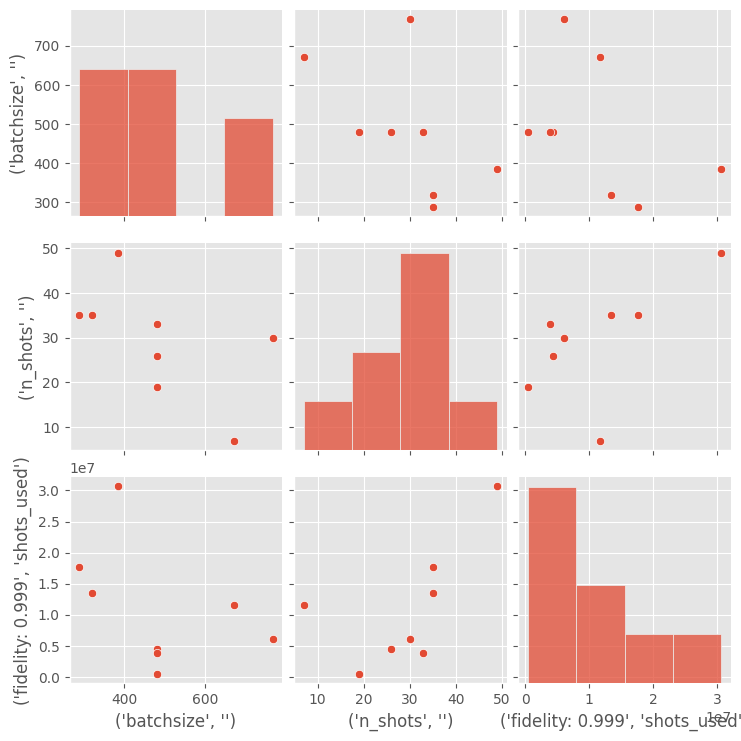

Fidelity target: 0.9999
------------------------------------------


       batchsize n_shots fidelity: 0.9999
                               shots_used
count          2       2                2
unique         2       2                2
top          320      35         32335680
freq           1       1                1

Correlation matrix:
                            batchsize n_shots fidelity: 0.9999
                                                    shots_used
batchsize                         1.0    -1.0             -1.0
n_shots                          -1.0     1.0              1.0
fidelity: 0.9999 shots_used      -1.0     1.0              1.0


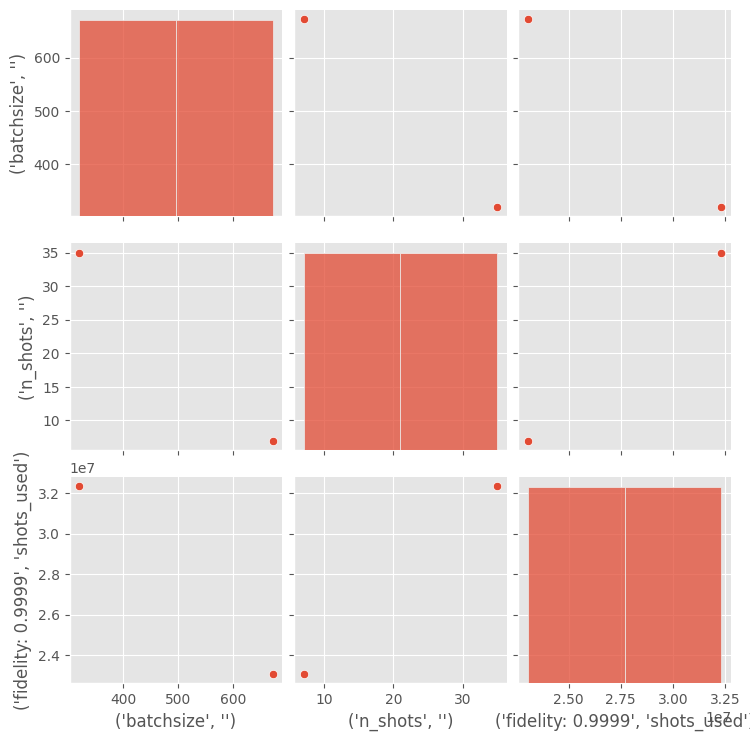

Fidelity target: 0.99999
------------------------------------------


       batchsize n_shots fidelity: 0.99999
                                shots_used
count          0       0                 0
unique         0       0                 0
top          NaN     NaN               NaN
freq         NaN     NaN               NaN

Correlation matrix:
                             batchsize n_shots fidelity: 0.99999
                                                      shots_used
batchsize                          NaN     NaN               NaN
n_shots                            NaN     NaN               NaN
fidelity: 0.99999 shots_used       NaN     NaN               NaN


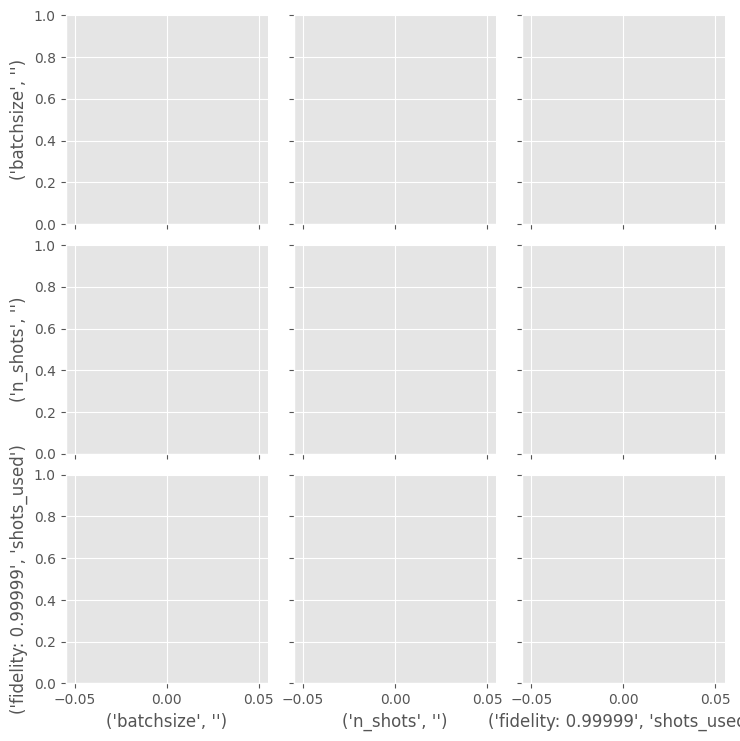

In [117]:
for fidelity in ['0.999', '0.9999', '0.99999']:
    
    considered_col = (f'fidelity: {fidelity}', 'considered')
    achieved_col = (f'fidelity: {fidelity}', 'achieved')
    shots_used_col = (f'fidelity: {fidelity}', 'shots_used')

    # Filter DataFrame for rows where fidelity is considered and achieved
    df = sorted_df[(sorted_df[considered_col] == True) & (sorted_df[achieved_col] == True)]

    shots_used_column = (f'fidelity: {fidelity}', 'shots_used')
    
    
    print(f'Fidelity target: {fidelity}')
    print('------------------------------------------')
    print('\n')
    
    # Summary statistics
    print(df[[('batchsize', ''), ('n_shots', ''), shots_used_column]].describe())

    # Correlation matrix
    print('\nCorrelation matrix:')
    print(df[[('batchsize', ''), ('n_shots', ''), shots_used_column]].corr())

    # Scatter plot for visual exploration
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.pairplot(df[[('batchsize', ''), ('n_shots', ''), shots_used_column]])
    plt.show()


In [118]:
fidelity = '0.99999'
considered_col = (f'fidelity: {fidelity}', 'considered')
achieved_col = (f'fidelity: {fidelity}', 'achieved')
shots_used_col = (f'fidelity: {fidelity}', 'shots_used')

# Filter DataFrame for rows where fidelity is considered and achieved
df = sorted_df[(sorted_df[considered_col] == True) & (sorted_df[achieved_col] == True)]
df[shots_used_col]

Series([], Name: (fidelity: 0.99999, shots_used), dtype: object)

In [119]:
shots_used_column

('fidelity: 0.99999', 'shots_used')

Mean Squared Error: 45450327362968.164


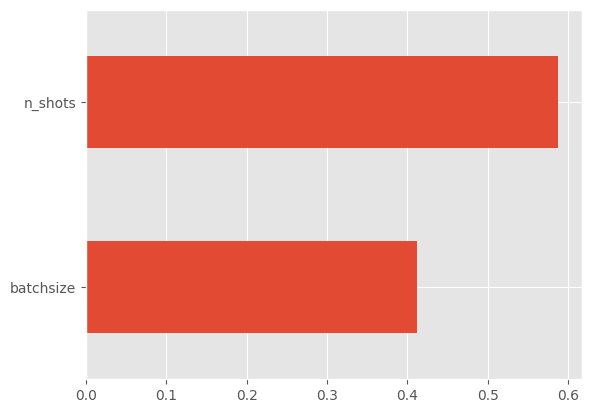

Mean Squared Error: 85988974104576.0


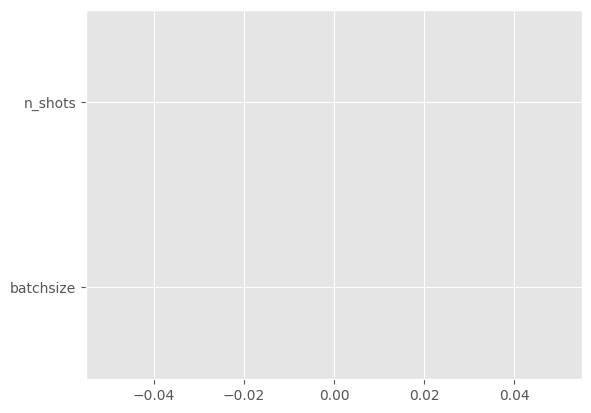

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by StandardScaler.

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


for fidelity in ['0.999', '0.9999', '0.99999']:
    
    considered_col = (f'fidelity: {fidelity}', 'considered')
    achieved_col = (f'fidelity: {fidelity}', 'achieved')
    shots_used_col = (f'fidelity: {fidelity}', 'shots_used')

    # Filter DataFrame for rows where fidelity is considered and achieved
    df = sorted_df[(sorted_df[considered_col] == True) & (sorted_df[achieved_col] == True)]

    shots_used_column = (f'fidelity: {fidelity}', 'shots_used')
    
    
    # Preparing the data
    X = df[[('batchsize', ''), ('n_shots', '')]]
    y = df[shots_used_column]

    # Flatten the multi-index for X if necessary
    X.columns = ['batchsize', 'n_shots']

    # Standardizing the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Training the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predicting and evaluating the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Feature importance
    feature_importances = pd.Series(model.feature_importances_, index=['batchsize', 'n_shots'])
    feature_importances.plot(kind='barh')
    plt.show()
